In [1]:
import pandas as pd
import numpy as np
import nltk
import pickle
import pyLDAvis.sklearn
from collections import Counter
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns
# Libraries for text preprocessing
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
#nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer
%matplotlib inline
pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', 100)

C:\Users\mwamb\Anaconda3\lib\site-packages\past\builtins\misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping


In [2]:
df = pd.read_csv("C:/Users/mwamb/Desktop/Desktop/tenthdimensionanalytics/UNICEF/UNICEF_clean_data.csv")

In [3]:
df

,Unnamed: 0,cluster,words,words_description,words_description_str,langs,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos,lemmatized
0,0,UNICEF,"www.thelancet.com/lancetgh \n Vol 7 July 2019\n e849National, regional, and worldwide estimat...","['www.thelancet.com/lancetgh', 'Vol', '7', 'July', '2019', 'e849National,', 'regional,', 'and', ...","www.thelancet.com/lancetgh Vol 7 July 2019 e849National, regional, and worldwide estimates of lo...",en,"['www.thelancet.com/lancetgh', 'Vol', '7', 'July', '2019', 'e849National', ',', 'regional', ',',...","['www.thelancet.com/lancetgh', 'vol', '7', 'july', '2019', 'e849national', ',', 'regional', ',',...","['www.thelancet.com/lancetgh', 'vol', '7', 'july', '2019', 'e849national', 'regional', 'and', 'w...","['www.thelancet.com/lancetgh', 'vol', '7', 'july', '2019', 'e849national', 'regional', 'worldwid...","[('www.thelancet.com/lancetgh', 'NN'), ('vol', 'NN'), ('7', 'CD'), ('july', 'NN'), ('2019', 'CD'...","[('www.thelancet.com/lancetgh', 'n'), ('vol', 'n'), ('7', 'n'), ('july', 'n'), ('2019', 'n'), ('...","['www.thelancet.com/lancetgh', 'vol', '7', 'july', '2019', 'e849national', 'regional', 'worldwid..."


In [4]:
df = df[['cluster', 'lemmatized']]
df

,cluster,lemmatized
0,UNICEF,"['www.thelancet.com/lancetgh', 'vol', '7', 'july', '2019', 'e849national', 'regional', 'worldwid..."


## Sentiment Analysis

In [5]:
df['sentiment'] = df['lemmatized'].apply(lambda x: TextBlob(x).sentiment.polarity)
df

,cluster,lemmatized,sentiment
0,UNICEF,"['www.thelancet.com/lancetgh', 'vol', '7', 'july', '2019', 'e849national', 'regional', 'worldwid...",0.063822


## UNICEF

### Data Exploration

https://medium.com/analytics-vidhya/automated-keyword-extraction-from-articles-using-nlp-bfd864f41b34

In [6]:
corpus= df['lemmatized']

In [7]:
corpus

0    ['www.thelancet.com/lancetgh', 'vol', '7', 'july', '2019', 'e849national', 'regional', 'worldwid...
Name: lemmatized, dtype: object

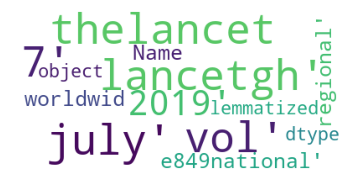

In [8]:
#Word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

wordcloud = WordCloud(
                          background_color='white',
                         
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

## Text preparation

Text in the corpus needs to be converted to a format that can be interpreted by the machine learning algorithms. 
There are 2 parts of this conversion

— Tokenisation and Vectorisation.
Tokenisation is the process of converting the continuous text into a list of words. 
The list of words is then converted to a matrix of integers by the process of vectorisation. Vectorisation is also called feature extraction.

For text preparation we use the bag of words model which ignores the sequence of the words and only considers word frequencies.

### Creating a vector of word counts
As the first step of conversion, we will use the CountVectoriser to tokenise the text and build a vocabulary of known words.
We first create a variable “cv” of the CountVectoriser class, and then evoke the fit_transform function to learn and build the vocabulary.

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=1.0, min_df=1, max_features=None, ngram_range=(1,3))
X=cv.fit_transform(corpus)

In [10]:
list(cv.vocabulary_.keys())[:50]


['www',
 'thelancet',
 'com',
 'lancetgh',
 'vol',
 'july',
 '2019',
 'e849national',
 'regional',
 'worldwide',
 'estimate',
 'low',
 'birthweight',
 '2015',
 'trend',
 '2000',
 'systematic',
 'analysishannah',
 'blencowe',
 'julia',
 'krasevec',
 'mercedes',
 'de',
 'oni',
 'robert',
 'black',
 'xiaoyi',
 'gretchen',
 'stevens',
 'elaine',
 'borghi',
 'chika',
 'hayashi',
 'diana',
 'estevez',
 'luca',
 'cegolon',
 'suhail',
 'shiekh',
 'victoria',
 'ponce',
 'hardy',
 'joy',
 'lawn',
 'simon',
 'cousens',
 'summarybackground',
 'lbw',
 'less',
 '2500']

### Unigram Bigram and trigram 

https://medium.com/analytics-vidhya/automated-keyword-extraction-from-articles-using-nlp-bfd864f41b34

[Text(0, 0, 'service'),
 Text(1, 0, 'country'),
 Text(2, 0, 'unicef'),
 Text(3, 0, 'child'),
 Text(4, 0, 'supply'),
 Text(5, 0, 'health'),
 Text(6, 0, 'million'),
 Text(7, 0, 'data'),
 Text(8, 0, 'survey'),
 Text(9, 0, 'ltd'),
 Text(10, 0, '000'),
 Text(11, 0, 'sanitation'),
 Text(12, 0, 'water'),
 Text(13, 0, 'communication'),
 Text(14, 0, 'print'),
 Text(15, 0, '2018'),
 Text(16, 0, 'of'),
 Text(17, 0, 'equipment'),
 Text(18, 0, 'research'),
 Text(19, 0, 'mortality')]

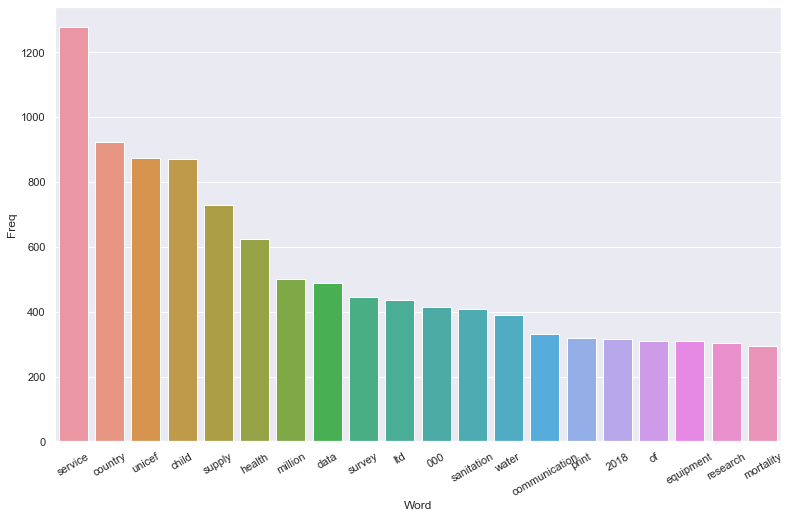

In [11]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]

#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]

#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

                 Bi-gram  Freq
0       water sanitation   338
1     monitor evaluation   257
2         survey monitor   256
3     evaluation service   256
4                  of ce   252
5        research survey   220
6              ce supply   194
7           design print   164
8   construction service   154
9       education supply   144
10     warehouse service   144
11     country logistics   143
12   logistics warehouse   143
13  communication design   135
14      supply equipment   133
15            in country   132
16        medical supply   128
17         united nation   116
18        private sector   116
19     sanitation relate   113


[Text(0, 0, 'water sanitation'),
 Text(1, 0, 'monitor evaluation'),
 Text(2, 0, 'survey monitor'),
 Text(3, 0, 'evaluation service'),
 Text(4, 0, 'of ce'),
 Text(5, 0, 'research survey'),
 Text(6, 0, 'ce supply'),
 Text(7, 0, 'design print'),
 Text(8, 0, 'construction service'),
 Text(9, 0, 'education supply'),
 Text(10, 0, 'warehouse service'),
 Text(11, 0, 'country logistics'),
 Text(12, 0, 'logistics warehouse'),
 Text(13, 0, 'communication design'),
 Text(14, 0, 'supply equipment'),
 Text(15, 0, 'in country'),
 Text(16, 0, 'medical supply'),
 Text(17, 0, 'united nation'),
 Text(18, 0, 'private sector'),
 Text(19, 0, 'sanitation relate')]

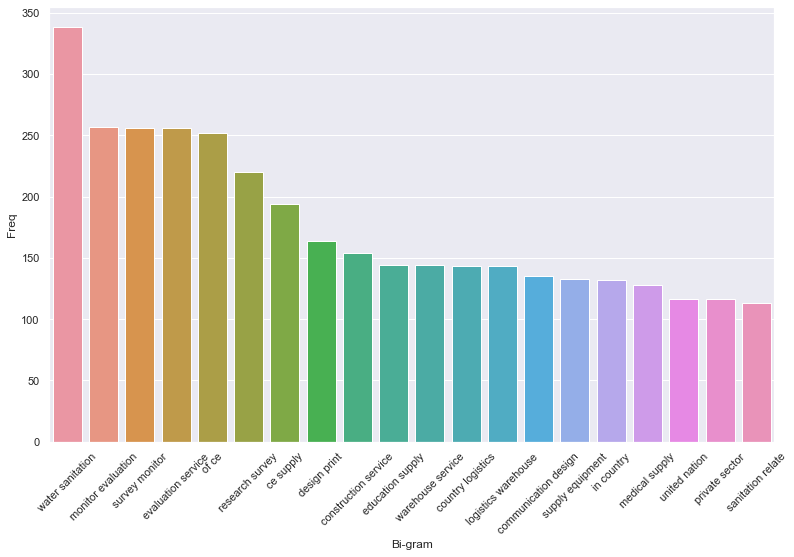

In [12]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)
#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

                                Tri-gram  Freq
0              survey monitor evaluation   256
1             monitor evaluation service   256
2                research survey monitor   219
3                           of ce supply   194
4            country logistics warehouse   143
5            logistics warehouse service   143
6             communication design print   135
7                   in country logistics   124
8               medical supply equipment   121
9              sanitation relate service   113
10      communication technology service   102
11               water sanitation relate    93
12  information communication technology    87
13         technical workforce programme    77
14         workforce programme execution    77
15             public relation fundraise    77
16           facility maintenance repair    75
17                        death per 1000    69
18                     travel food lodge    69
19                   per 1000 livebirths    67


[Text(0, 0, 'survey monitor evaluation'),
 Text(1, 0, 'monitor evaluation service'),
 Text(2, 0, 'research survey monitor'),
 Text(3, 0, 'of ce supply'),
 Text(4, 0, 'country logistics warehouse'),
 Text(5, 0, 'logistics warehouse service'),
 Text(6, 0, 'communication design print'),
 Text(7, 0, 'in country logistics'),
 Text(8, 0, 'medical supply equipment'),
 Text(9, 0, 'sanitation relate service'),
 Text(10, 0, 'communication technology service'),
 Text(11, 0, 'water sanitation relate'),
 Text(12, 0, 'information communication technology'),
 Text(13, 0, 'technical workforce programme'),
 Text(14, 0, 'workforce programme execution'),
 Text(15, 0, 'public relation fundraise'),
 Text(16, 0, 'facility maintenance repair'),
 Text(17, 0, 'death per 1000'),
 Text(18, 0, 'travel food lodge'),
 Text(19, 0, 'per 1000 livebirths')]

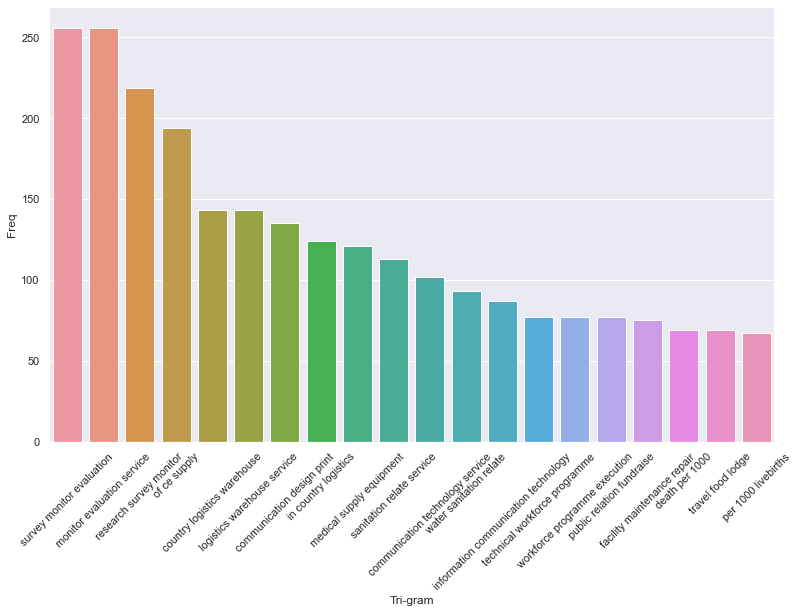

In [13]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)
#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

## Topic Modeling

https://towardsdatascience.com/nlp-part-3-exploratory-data-analysis-of-text-data-1caa8ab3f79d

In [14]:


tf_vectorizer = CountVectorizer(max_df=1.0, min_df=1, max_features=None)
tf = tf_vectorizer.fit_transform(df['lemmatized'].values.astype('U'))
tf_feature_names = tf_vectorizer.get_feature_names()
doc_term_matrix = pd.DataFrame(tf.toarray(), columns=list(tf_feature_names))
doc_term_matrix

,00,000,0000,0000000,0000000100200300400500600700160178285167us,000000185714,00002030,00006,0001,00010,...,ﬁnow,ﬁsafer,ﬁstrong,ﬁthe,ﬁthey,ﬁto,ﬁunder,ﬁunicef,ﬁwhen,ﬁwhoever
0,52,413,6,1,1,1,1,1,6,19,...,1,1,1,2,3,2,3,1,1,1


### Latent Dirichlet Allocation (LDA) Topic Modeling

In [15]:
lda_model = LatentDirichletAllocation(n_components=10, learning_method='online', max_iter=50, random_state=0).fit(tf)
no_top_words = 10
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                          for i in topic.argsort()[:-no_top_words - 1:-1]]))
              
display_topics(lda_model, tf_feature_names, no_top_words)

Topic 0:
country unicef service supply ltd child survey data health million
Topic 1:
service unicef child health million country 000 supply data water
Topic 2:
service unicef child country health supply data ltd million survey
Topic 3:
service country unicef child supply health million data survey ltd
Topic 4:
service supply country child unicef data health million ltd 000
Topic 5:
service country child supply unicef health data sanitation equipment 000
Topic 6:
service child country supply health unicef million water ltd sanitation
Topic 7:
service child supply country unicef million health ltd water 000
Topic 8:
service child country unicef supply survey sanitation ltd health water
Topic 9:
service unicef child country supply 000 health survey data water


### pyLDAvis

In [16]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_model, tf, tf_vectorizer, mds='tsne')
panel


C:\Users\mwamb\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
3     -159.421631   65.703239       1        1  99.999038
1      -45.684250  142.174408       2        1   0.000107
0      102.458076  -96.700706       3        1   0.000107
7      -28.367338 -151.130203       4        1   0.000107
5        4.912716  -50.437290       5        1   0.000107
6      -61.192379   29.268387       6        1   0.000107
8     -123.043282  -66.440369       7        1   0.000107
4      145.007660   18.075964       8        1   0.000107
9       81.335243  144.666946       9        1   0.000107
2       40.890770   46.637230      10        1   0.000107, topic_info=      Category         Freq     Term        Total  loglift  logprob
14102  Default  1252.000000  service  1252.000000  30.0000  30.0000
15922  Default   855.000000   unicef   855.000000  29.0000  29.0000
6648   Default   906.000000  country   906.000000  28.0000  28.0000
6053   Default   854.000000    child   854.000000  27.0000  27.0000
14770  Default   714.000000   supply   714.000000  26.0000  26.0000
...        ...          ...      ...          ...      ...      ...
8666   Topic10     0.000007   global   261.085209  -3.6603  -9.5417
1123   Topic10     0.000007     2018   310.142820  -3.8291  -9.5383
14012  Topic10     0.000007   sector   195.340569  -3.3770  -9.5485
7007   Topic10     0.000007   design   204.182367  -3.4241  -9.5513
8785   Topic10     0.000007    group   246.371861  -3.6092  -9.5486

[638 rows x 6 columns], token_table=       Topic      Freq              Term
term                                    
1          1  0.999329               000
3          1  0.921374           0000000
63         1  0.920962  000eurotrubplast
99         1  0.919940             00127
144        1  0.921316             00341
...      ...       ...               ...
16519      1  0.920697         worldlink
16589      1  0.920643            yemeke
16675      1  0.920002               zha
16676      1  0.920851             zhang
16687      1  0.921118            zimeti

[343 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 1, 8, 6, 7, 9, 5, 10, 3])